# Author: ABSAR AHMED
# Task#7
# Object

- Create a hybrid model for stock price/performanceprediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
-  You are free to select a different stock to analyze and news dataset as well while not changing the objective of the task.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df= pd.read_csv("F:\The Spark Foundation Dataset Csv\INTC.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,46.320000,46.450001,45.240002,46.360001,46.080296,53775700
1,2020-12-22,46.250000,46.340000,45.770000,46.169998,45.891441,32171200
2,2020-12-23,46.169998,47.029999,46.070000,46.570000,46.289028,22564200


In [4]:
df.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
58,2021-03-17,64.220001,66.290001,63.709999,65.779999,65.779999,32356200
59,2021-03-18,65.629997,65.699997,63.650002,63.730000,63.730000,30094200
60,2021-03-19,63.180000,64.989998,62.919998,63.759998,63.759998,54947100


In [5]:
df.shape

(61, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61 non-null     object 
 1   Open       61 non-null     float64
 2   High       61 non-null     float64
 3   Low        61 non-null     float64
 4   Close      61 non-null     float64
 5   Adj Close  61 non-null     float64
 6   Volume     61 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,57.278033,58.395246,56.556886,57.479344,57.321198,3.676630e+07
std,5.410273,5.518892,5.277198,5.382255,5.497391,1.962537e+07
min,46.169998,46.340000,45.240002,46.169998,45.891441,1.186560e+07
25%,54.610001,54.849998,53.299999,53.590000,53.266674,2.632630e+07
50%,58.849998,59.619999,57.939999,58.779999,58.779999,3.148590e+07
75%,61.180000,62.869999,60.639999,61.810001,61.810001,3.821040e+07
max,65.629997,66.290001,64.080002,65.779999,65.779999,1.240707e+08


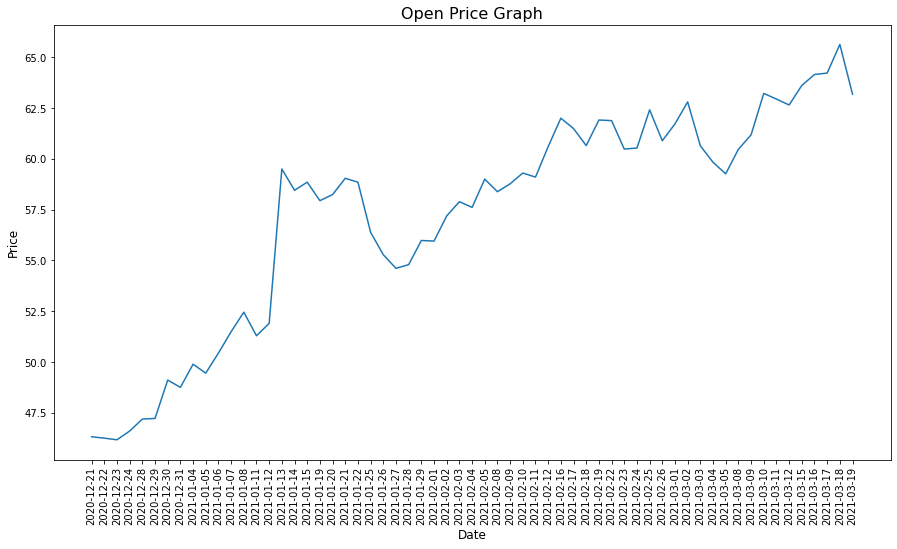

In [8]:
plt.figure(figsize=(15,8))
plt.plot(df['Date'],df['Open'])
plt.xticks(rotation=90)
plt.title("Open Price Graph", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

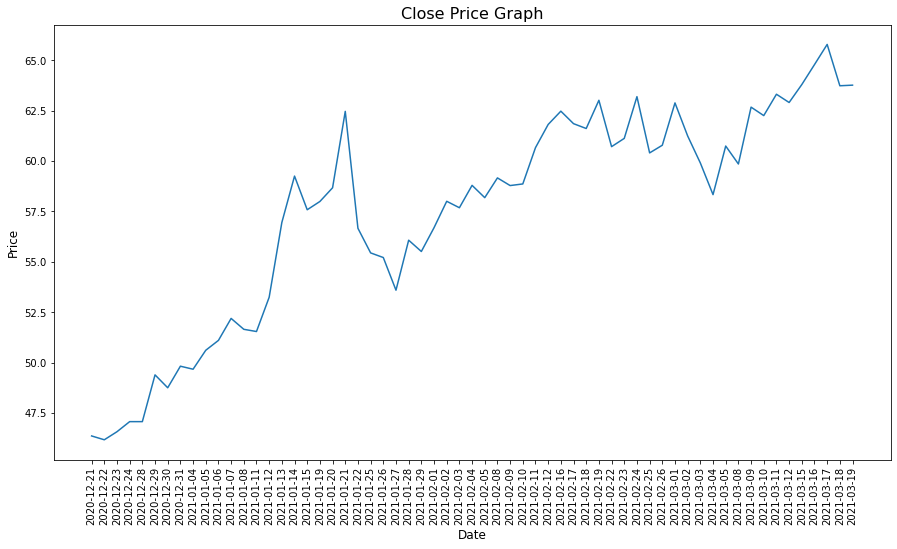

In [9]:
plt.figure(figsize=(15,8))
plt.plot(df['Date'],df['Close'])
plt.xticks(rotation=90)
plt.title("Close Price Graph", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

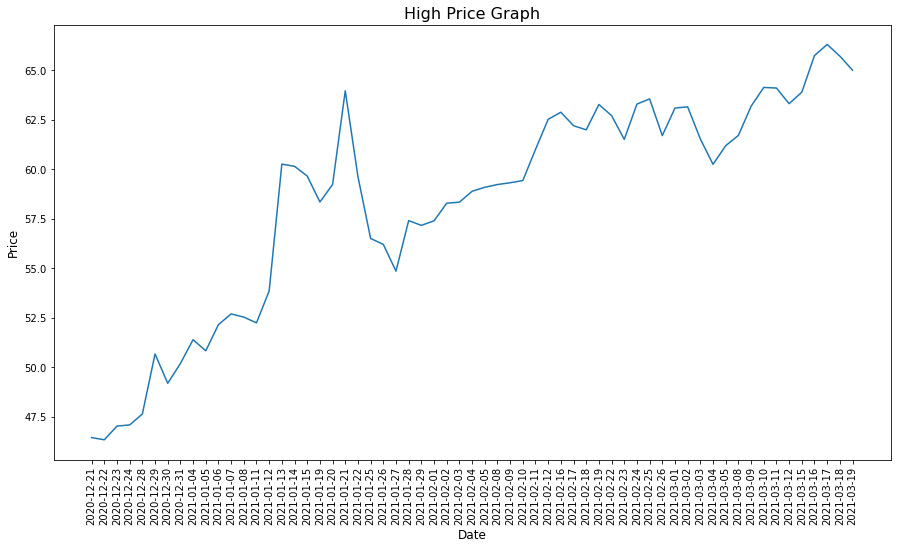

In [10]:
plt.figure(figsize=(15,8))
plt.plot(df['Date'],df['High'])
plt.xticks(rotation=90)
plt.title("High Price Graph", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

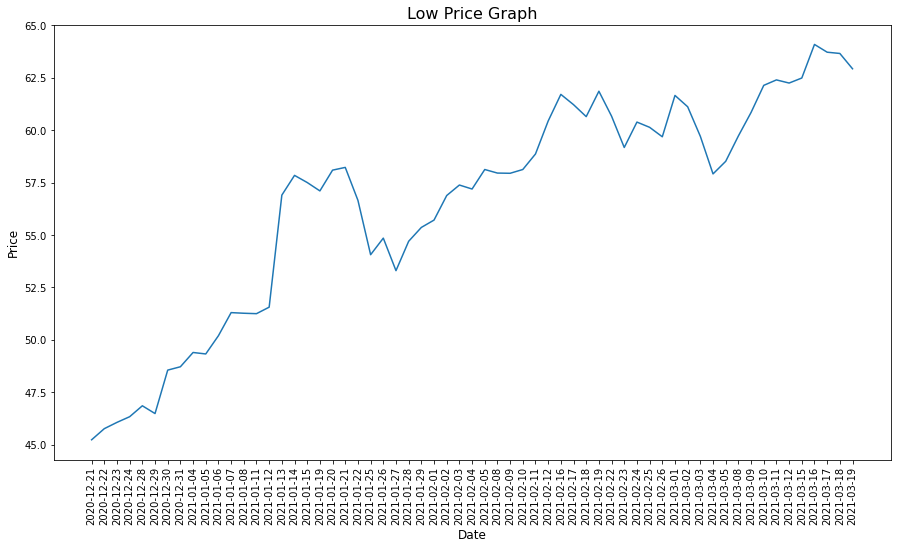

In [11]:
plt.figure(figsize=(15,8))
plt.plot(df['Date'],df['Low'])
plt.xticks(rotation=90)
plt.title("Low Price Graph", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
X = df.iloc[:,1:7].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor

reg  = RandomForestRegressor(n_estimators=10, random_state=0)
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [17]:
y_pred  = reg.predict(X_test)
y_pred

array([37816460., 27464540., 52429130., 23671780., 32110350., 20499360.,
       18961360., 30157840., 28579910., 52160100., 19300320., 36793640.,
       29772850.])

In [18]:
reg.score(X_test,y_test)

0.9419781347480701

# Textual Analysis

In [19]:
df1= pd.read_csv("F:\The Spark Foundation Dataset Csv\india-news-headlines.csv")

In [20]:
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [21]:
df1.shape

(3424067, 3)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [23]:
df1.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [24]:
df1['headline_text']

0          Status quo will not be disturbed at Ayodhya; s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3424062    Covid-19: Despite dip in cases; Rajasthan amon...
3424063    Covid-19: Despite dip in cases; Rajasthan amon...
3424064    Covid-19: Despite dip in cases; Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

# Missing values

In [25]:
df1.drop('headline_category', axis=1, inplace=True)
df1['publish_date']= pd.to_datetime(df1['publish_date'],format='%Y%m%d')
df1.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [26]:
df1.rename(columns={'publish_date':'Date'}, inplace=True)

In [27]:
df1  =  df1.drop_duplicates()
df1.reset_index(inplace=True, drop=True)
df1.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [28]:
df1 = df1[:6000]

In [29]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def  getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
df1['Subjectivity'] = df1['headline_text'].apply(getSubjectivity)
df1['Polarity'] = df1['headline_text'].apply(getPolarity)

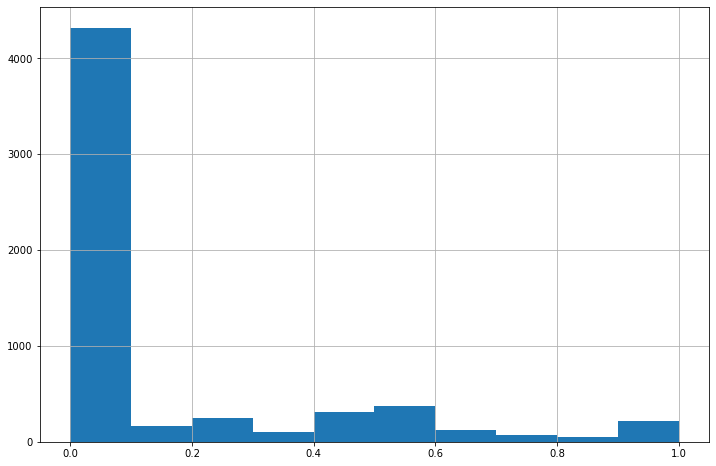

In [31]:
plt.figure(figsize=(12,8))
df1['Subjectivity'].hist()
plt.show()

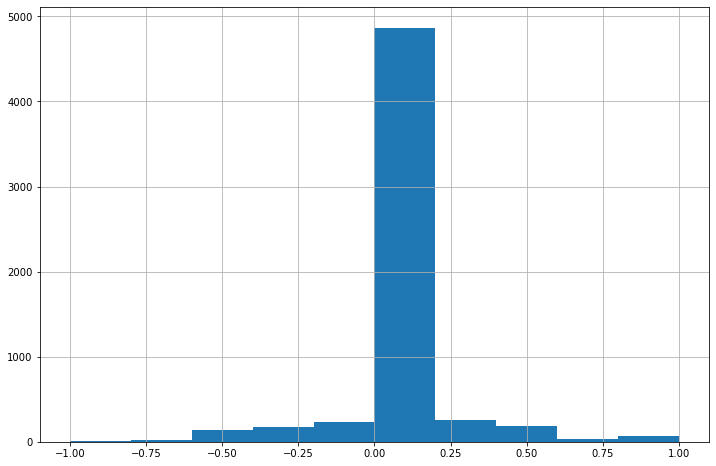

In [32]:
plt.figure(figsize=(12,8))
df1['Polarity'].hist()
plt.show()

In [33]:
df1['Subjectivity'] = df1['headline_text'].apply(getSubjectivity)
df1['Polarity'] = df1['headline_text'].apply(getPolarity)

# SentimentIntensityAnalyzer

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sent =  SentimentIntensityAnalyzer()

In [37]:
df1['compound'] = [sent.polarity_scores(i)['compound']for i in df1['headline_text']]
df1['Negative'] = [sent.polarity_scores(i)['neg']for i in df1['headline_text']]
df1['Neutral'] = [sent.polarity_scores(i)['neu']for i in df1['headline_text']]
df1['Positive'] = [sent.polarity_scores(i)['pos']for i in df1['headline_text']]

In [38]:
df1.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342


# Conclusion

The Model Accuracy is 94%